In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import v_measure_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from KMeans import KMeans as my_kmeans

# Part 1: EDA

In [2]:
# Load weather data
df = pd.read_csv("historical-weather.csv")
df

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,100,2011-09-10 01:40:49,911.8,62.96,95.0,2.3,106.0,2.5,88.0,1.9,0.0,0.0,63.9
2,200,2011-09-10 03:20:49,911.4,68.00,53.0,0.3,69.0,0.5,19.0,0.2,0.0,0.0,33.4
3,300,2011-09-10 05:00:49,911.4,64.22,191.0,2.8,197.0,2.9,185.0,2.6,0.0,0.0,58.2
4,400,2011-09-10 06:40:49,912.2,52.70,181.0,1.5,191.0,2.0,164.0,1.2,0.0,0.0,89.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15868,1586800,2014-09-10 16:23:29,914.3,77.18,225.0,5.2,238.0,6.0,214.0,4.4,0.0,0.0,43.2
15869,1586900,2014-09-10 18:03:29,914.4,77.00,190.0,1.5,196.0,1.7,185.0,1.4,0.0,0.0,42.8
15870,1587000,2014-09-10 19:43:29,914.9,75.92,344.0,0.4,352.0,0.6,336.0,0.3,0.0,0.0,43.9
15871,1587100,2014-09-10 21:23:29,915.7,75.38,13.0,1.5,24.0,1.7,4.0,1.2,0.0,0.0,46.7


## Clean Data

In [3]:
# Overview of the data
# Check to see if any column is not numerical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15873 entries, 0 to 15872
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rowID               15873 non-null  int64  
 1   hpwren_timestamp    15873 non-null  object 
 2   air_pressure        15873 non-null  float64
 3   air_temp            15873 non-null  float64
 4   avg_wind_direction  15870 non-null  float64
 5   avg_wind_speed      15870 non-null  float64
 6   max_wind_direction  15870 non-null  float64
 7   max_wind_speed      15870 non-null  float64
 8   min_wind_direction  15870 non-null  float64
 9   min_wind_speed      15870 non-null  float64
 10  rain_accumulation   15872 non-null  float64
 11  rain_duration       15872 non-null  float64
 12  relative_humidity   15873 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.6+ MB


In [4]:
# Drop timestamp column in weather dataset because it's numerical.
df = df.drop(columns=["hpwren_timestamp"])

# Checking for null value in dataframe
df.isna().sum()

rowID                 0
air_pressure          0
air_temp              0
avg_wind_direction    3
avg_wind_speed        3
max_wind_direction    3
max_wind_speed        3
min_wind_direction    3
min_wind_speed        3
rain_accumulation     1
rain_duration         1
relative_humidity     0
dtype: int64

In [5]:
# Fill in null value with 0.
df = df.fillna(0)

# Check null value in dataframe again to make sure
df.isna().sum()

rowID                 0
air_pressure          0
air_temp              0
avg_wind_direction    0
avg_wind_speed        0
max_wind_direction    0
max_wind_speed        0
min_wind_direction    0
min_wind_speed        0
rain_accumulation     0
rain_duration         0
relative_humidity     0
dtype: int64

## Visualize Expected Cluster 

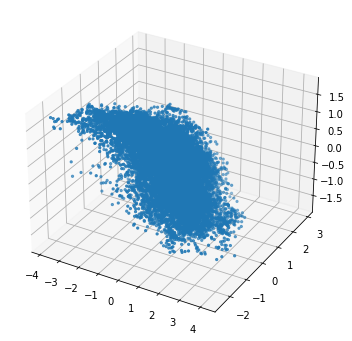

In [6]:
# scaler to scale data for better KMeans
scaler = StandardScaler()
scaler.fit(df.iloc[:,1:])
scaled_data = scaler.transform(df.iloc[:,1:])



# Sub dataframe from air_pressure, air_temp, and relative_humidity column
# and then scale it.
pressure_temp_humidity = df[['air_pressure', 'air_temp', 'relative_humidity']]
scaler.fit(pressure_temp_humidity)
scaled_data = scaler.transform(pressure_temp_humidity)


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')

ax.scatter(scaled_data[:, 0], scaled_data[:, 1], scaled_data[:, 2], s=5)
plt.show()

# Well it's just a big chunk of data. We can't tell the number of cluster from this yet.

# Part 2 and 3: Implement KMeans in Python and Comparing with Sklearn's KMeans

In [7]:
# Initialize my implementation of kmeans and sklearn's kmeans
cluster_er = my_kmeans(n_clusters=3, max_iter=500,random_state=None)
sklearn_kmeans = KMeans(n_clusters = 3)

In [8]:
# Run KMeans on historical dataset
cluster_er.fit(scaled_data)
sklearn_kmeans.fit(scaled_data)
print(cluster_er.cluster_centers_)
print(sklearn_kmeans.cluster_centers_)

# From the result, it looks like my implementation and sklearn's implementation produce quite similar cluster_centers

[[ 1.17040372 -0.09074058 -0.85308927]
 [-0.29412676  0.83882651 -0.43513867]
 [-0.4493708  -0.97037589  1.12765237]]
[[-0.44796609 -0.97266831  1.12851238]
 [ 1.16306021 -0.08058066 -0.85417943]
 [-0.30118847  0.83871772 -0.4302702 ]]


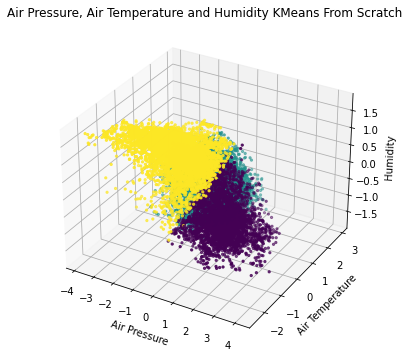

In [9]:
# Let's graph it
# KMeans implementation
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')

ax.scatter(scaled_data[:, 0], scaled_data[:, 1], scaled_data[:, 2], c = cluster_er.labels_, s=5, cmap='viridis')
ax.set_xlabel('Air Pressure')
ax.set_ylabel('Air Temperature')
ax.set_zlabel('Humidity')
plt.title("Air Pressure, Air Temperature and Humidity KMeans From Scratch")
plt.show()

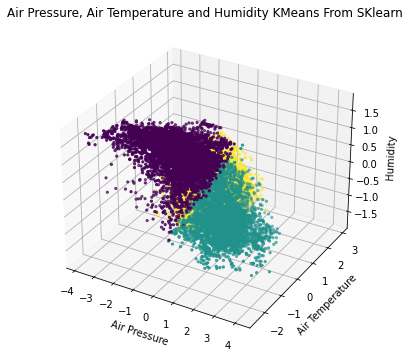

In [11]:
# Let's graph it
# KMeans implementation
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')

ax.scatter(scaled_data[:, 0], scaled_data[:, 1], scaled_data[:, 2], c = sklearn_kmeans.labels_, s=5, cmap='viridis')
ax.set_xlabel('Air Pressure')
ax.set_ylabel('Air Temperature')
ax.set_zlabel('Humidity')
plt.title("Air Pressure, Air Temperature and Humidity KMeans From SKlearn")
plt.show()

# Again the two graph looks identical

## Checking v_measure_score of my KMeans and SKlearn's KMeans

In [12]:
cluster_er.fit(scaled_data)
sklearn_kmeans.fit(scaled_data)
print(v_measure_score(sklearn_kmeans.labels_, cluster_er.labels_))

# This is quite good already.
# From observation, my implementation and sklearn produce quite similar output in terms of graphing. 
# The clusters appear to be balanced, and I was able to find cluster in the same region.
# Although my implementation produces a tiny tiny bit of a difference when it comes to cluster_centers. My cluster_centers and sklearn's are off by around 0.001, which I think is good enough.

0.9846626082798352
